<a href="https://colab.research.google.com/github/vaneesa-writes/micro_project/blob/main/MNIST_fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [4]:
label_names = {0 :"T-shirt/top",
1 :"Trouser",
2 :"Pullover",
3:" Dress",
4 :"Coat",
5 :"Sandal",
6 :"Shirt",
7 :"Sneaker",
8 :"Bag",
9 :"Ankle boot"}

In [5]:
def drawimg(img,ind,i):
  plt.figure(i+1)
  plt.style.use("seaborn")
  plt.axis('off')
  plt.imshow(x_train[ind],cmap='gray')
  plt.title(label_names[ind])
  plt.show()

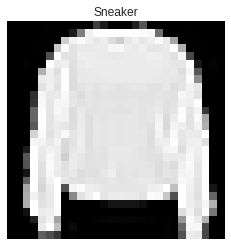

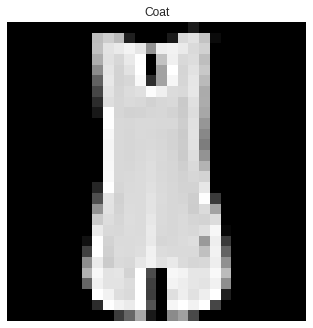

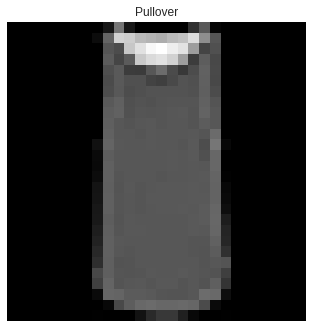

In [6]:
for i in range(3):
  ind = np.random.randint(60000)
  drawimg(x_train[ind],y_train[ind],i)

In [7]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [8]:
x_train = x_train.reshape((-1,28,28,1))
y_train = tf.keras.utils.to_categorical(y_train)

In [9]:
x_test = x_test.reshape((-1,28,28,1))
y_test = tf.keras.utils.to_categorical(y_test)

In [10]:
import tensorflow.keras.backend as K
from tensorflow.keras.layers import (Input, Conv2D, MaxPooling2D, Flatten, 
                                     Dense, Dropout, BatchNormalization)
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers


In [11]:
model = Sequential([
        Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same', 
               input_shape=(28, 28, 1)),
        BatchNormalization(),
        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),

        Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(128, kernel_size=(3, 3), activation='relu'),
        BatchNormalization(),        
        MaxPooling2D(pool_size=(2, 2)),
        
        Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(256, kernel_size=(3, 3), activation='relu'),
        BatchNormalization(),    
        MaxPooling2D(pool_size=(2, 2)),   
        
        Flatten(),
        
        Dense(1024, activation='relu'),
        
        Dense(512, activation='relu'),
        
        Dense(10, activation='softmax')
    ])


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 64)        36928     
                                                                 
 batch_normalization_1 (Batc  (None, 26, 26, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                        

In [13]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [14]:
history = model.fit(x_train,y_train,validation_split=0.3,shuffle=True,batch_size=512,epochs=10)

Epoch 1/10
83/83 [==============================] - 564s 7s/step - loss: 0.4753 - accuracy: 0.8256 - val_loss: 3.0982 - val_accuracy: 0.0983
Epoch 2/10
83/83 [==============================] - 523s 6s/step - loss: 0.2702 - accuracy: 0.9005 - val_loss: 5.1285 - val_accuracy: 0.0983
Epoch 3/10
83/83 [==============================] - 529s 6s/step - loss: 0.2074 - accuracy: 0.9235 - val_loss: 7.8998 - val_accuracy: 0.0983
Epoch 4/10
83/83 [==============================] - 526s 6s/step - loss: 0.1929 - accuracy: 0.9271 - val_loss: 4.9074 - val_accuracy: 0.1572
Epoch 5/10
83/83 [==============================] - 527s 6s/step - loss: 0.1664 - accuracy: 0.9371 - val_loss: 5.4877 - val_accuracy: 0.1953
Epoch 6/10
83/83 [==============================] - 527s 6s/step - loss: 0.1263 - accuracy: 0.9532 - val_loss: 2.5019 - val_accuracy: 0.5288
Epoch 7/10
83/83 [==============================] - 527s 6s/step - loss: 0.1257 - accuracy: 0.9532 - val_loss: 0.6213 - val_accuracy: 0.8134
Epoch 8/10
83

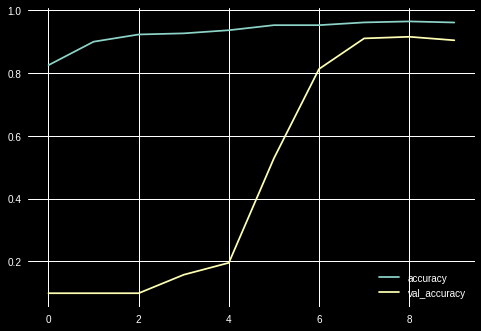

In [19]:
plt.style.use('dark_background')
plt.plot(history.history['accuracy'],label = 'accuracy')
plt.plot(history.history['val_accuracy'],label = 'val_accuracy')
plt.legend()
plt.show()

In [20]:
result = model.evaluate(x_test,y_test)

313/313 [==============================] - 28s 91ms/step - loss: 0.3764 - accuracy: 0.9019


In [24]:
print(f"The testing accuracy was { result[1]} and loss was {result[0]}")

The testing accuracy was %.2f 0.9018999934196472 and loss was 0.37640002369880676


In [34]:
predicted_values = model.predict(x_test)

In [35]:
predicted_values

array([[1.8930842e-10, 1.8881090e-09, 6.9730363e-12, ..., 9.0761614e-06,
        1.8120322e-10, 9.9999070e-01],
       [2.1284375e-08, 1.2804619e-08, 9.9997151e-01, ..., 2.4254837e-10,
        6.4474390e-09, 5.4991445e-10],
       [1.2248084e-17, 1.0000000e+00, 3.5307936e-18, ..., 6.2923181e-21,
        1.6740563e-18, 1.5894573e-18],
       ...,
       [1.4435386e-12, 1.8802386e-12, 2.3868847e-12, ..., 2.8709682e-15,
        1.0000000e+00, 4.4736439e-15],
       [7.7637988e-17, 1.0000000e+00, 8.8701861e-18, ..., 2.1786698e-20,
        5.9595442e-19, 5.0954293e-18],
       [2.8265409e-05, 3.4039178e-06, 8.6389096e-05, ..., 7.0513308e-01,
        3.3930491e-04, 2.5148754e-04]], dtype=float32)

In [37]:
import numpy as np
predicted = np.argmax(predicted_values,axis=1)

predicted.shape
print(predicted)

[9 2 1 ... 8 1 7]


In [39]:
actual = np.argmax(y_test,axis=1)

array([9, 2, 1, ..., 8, 1, 5])

In [42]:
actual.shape

(10000,)

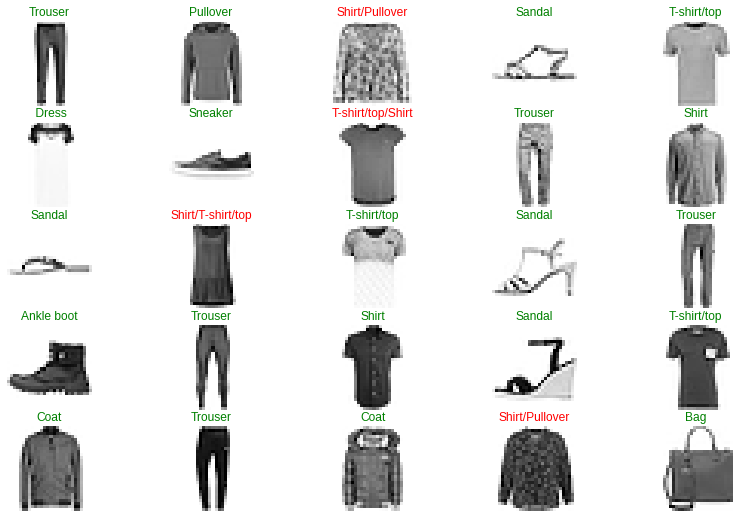

In [60]:
f, axarr = plt.subplots(5,5,figsize=((14, 9)))
for row in range(5):
  for col in range(5):

    ind = np.random.randint(10000)
    img = x_test[ind].reshape((28,28))
    axarr[row, col].axis("off")
    axarr[row,col].imshow(img)
    true_label = actual[ind]
    pred_label = predicted[ind]
    prediction_matches_true = (true_label == pred_label)
    if prediction_matches_true:
      title = label_names[true_label]
      title_color = 'g'
    else:
      title = '%s/%s' % (label_names[true_label], label_names[pred_label])
      title_color = 'r'
    title = axarr[row, col].set_title(title)
    plt.setp(title, color=title_color)

